In [1]:
from zipfile import ZipFile
file_name = "Flowers.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
x_train=train_datagen.flow_from_directory(r"/content/flowers",target_size=(64,64),
                                                            class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [6]:
x_test=test_datagen.flow_from_directory(r"/content/flowers",target_size=(64,64),
                                                            class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [7]:
from tensorflow.keras.models import Sequential

In [8]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [9]:
model=Sequential()

In [10]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(300,activation='relu'))

In [14]:
model.add(Dense(5,activation="softmax"))

In [15]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [16]:
len(x_train)

180

In [17]:
model.fit(x_train,epochs=5,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

Epoch 1/5
180/180 [==============================] - 55s 303ms/step - loss: 1.3557 - accuracy: 0.4878 - val_loss: 1.0343 - val_accuracy: 0.6004
Epoch 2/5
180/180 [==============================] - 53s 296ms/step - loss: 1.0432 - accuracy: 0.5877 - val_loss: 1.0443 - val_accuracy: 0.6030
Epoch 3/5
180/180 [==============================] - 53s 297ms/step - loss: 0.9733 - accuracy: 0.6187 - val_loss: 1.0089 - val_accuracy: 0.6240
Epoch 4/5
180/180 [==============================] - 54s 297ms/step - loss: 0.9271 - accuracy: 0.6405 - val_loss: 0.8920 - val_accuracy: 0.6650
Epoch 5/5
180/180 [==============================] - 53s 295ms/step - loss: 0.8805 - accuracy: 0.6539 - val_loss: 0.8314 - val_accuracy: 0.6898


In [18]:
model.save("sunflower.h5")

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

In [20]:
model=load_model("/content/sunflower.h5")

In [21]:
img=image.load_img("/content/flowers/sunflower/10386540106_1431e73086_m.jpg",target_size=(64,64))

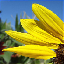

In [22]:
img

In [23]:
x=image.img_to_array(img)

In [24]:
x

array([[[ 60., 122., 235.],
        [ 66., 115., 217.],
        [ 61., 116., 209.],
        ...,
        [ 37.,  99., 198.],
        [ 38., 101., 196.],
        [ 44., 109., 211.]],

       [[ 69., 128., 198.],
        [ 67., 121., 181.],
        [ 68., 119., 182.],
        ...,
        [ 56., 106., 169.],
        [ 59., 107., 169.],
        [ 59., 118., 194.]],

       [[ 72., 121., 198.],
        [ 70., 118., 184.],
        [ 66., 119., 187.],
        ...,
        [ 56., 108., 168.],
        [ 61., 108., 176.],
        [ 62., 118., 201.]],

       ...,

       [[ 71.,  85.,  59.],
        [ 69.,  90.,  51.],
        [ 57.,  71.,  48.],
        ...,
        [ 25.,  12.,   6.],
        [ 37.,  23.,  14.],
        [ 37.,  18.,  12.]],

       [[ 36.,  49.,  31.],
        [ 45.,  65.,  28.],
        [ 62.,  79.,  43.],
        ...,
        [ 62.,  45.,  37.],
        [ 66.,  58.,  45.],
        [ 10.,   0.,   0.]],

       [[ 34.,  42.,  27.],
        [ 37.,  41.,  14.],
        [ 43.,  

In [25]:
x.ndim

3

In [26]:
x=np.expand_dims(x,axis=0)

In [27]:
x.ndim

4

In [28]:
pred=model.predict(x)


In [29]:
pred

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [30]:
labels=["daisy","dandelion","rose","sunflower","tulip"]

In [31]:
np.argmax(pred)

3

In [32]:
labels[2]

'rose'

In [33]:
labels[np.argmax(pred)]

'sunflower'